Depth 0:


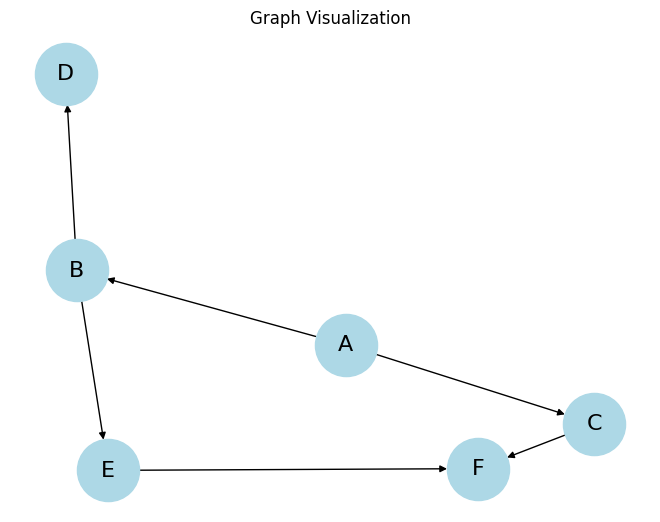

Order of visited nodes: ['A', 'A']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Define the graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Create a directed graph for visualization
G = nx.DiGraph(graph)

# Define the depth-limited DFS function
def depth_limited_dfs(graph, node, depth, visited):
    if depth == 0:
        visited.append(node)  # Process the node (store it)
        return True  # Return True if the node is processed at this depth
    if depth > 0:
        for neighbor in graph[node]:
            if neighbor not in visited:  # Avoid revisiting nodes
                visited.append(neighbor)  # Mark neighbor as visited
                if depth_limited_dfs(graph, neighbor, depth - 1, visited):
                    return True
    return False

# Define the IDDFS function
def iddfs(graph, start):
    depth = 0
    visited_order = []  # To keep track of the order of visited nodes
    while True:
        visited = []  # Reset visited for each depth
        visited.append(start)
        print(f"Depth {depth}:")
        if depth_limited_dfs(graph, start, depth, visited):
            visited_order.extend(visited)
            break  # Exit if the goal is found
        visited_order.extend(visited)
        depth += 1  # Increase depth limit
    return visited_order

# Run IDDFS starting from node 'A' and get the order of visited nodes
visited_order = iddfs(graph, 'A')

# Visualization
pos = nx.spring_layout(G)  # Position for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_color='black')
plt.title('Graph Visualization')
plt.show()

# Print the order of visited nodes
print("Order of visited nodes:", visited_order)
